# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [61]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

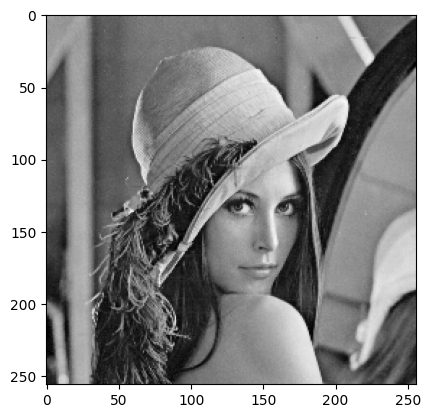

In [62]:
img = plt.imread('data/lena.png')
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [63]:
def meanfilter(img, size):
    img_mean = img.copy()
    result = numpy.zeros(img_mean.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_mean.shape):
        neighborhood_sum = 0
        r = p[0]
        c = p[1]
        if r >= (0+n) and c >= (0+n) and r < (img_mean.shape[0]-n) and c < (img_mean.shape[1]-n):
            for q in numpy.ndindex(size, size):
                r2 = p[0]+q[0]-n
                c2 = p[1]+q[1]-n
                neighborhood_sum += img_mean[r2, c2]
        result[r, c] = (neighborhood_sum)/(size ** 2)
    
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

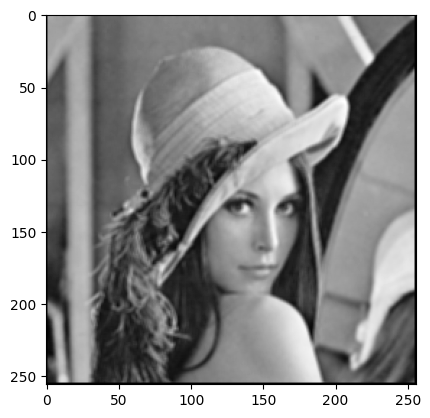

In [64]:
plt.imshow(meanfilter(img, 3), 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

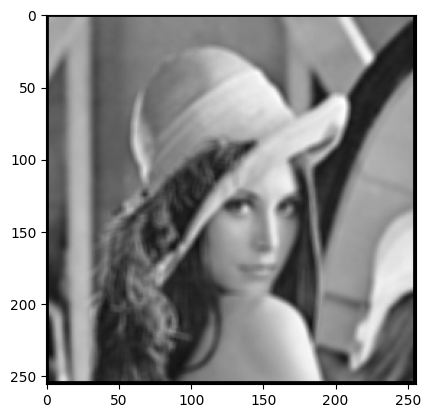

In [65]:
lena = plt.imread('data/lena_meanfilter5.png')
plt.imshow(lena, 'gray')
assert numpy.allclose(meanfilter(img, 5), lena, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [66]:
def medianfilter(img, size):
    img_mean = img.copy()
    result = numpy.zeros(img_mean.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_mean.shape):
        data = list()
        r = p[0]
        c = p[1]
        if r >= (n) and c >= (n) and r < (img_mean.shape[0]-n) and c < (img_mean.shape[1]-n):
            for q in numpy.ndindex(size, size):
                r2 = p[0]+q[0]-n
                c2 = p[1]+q[1]-n
                data.append(img_mean[r2, c2]) 
            median = sorted(data)[int((len(data)-1)/2)]
            result[r, c] = median
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

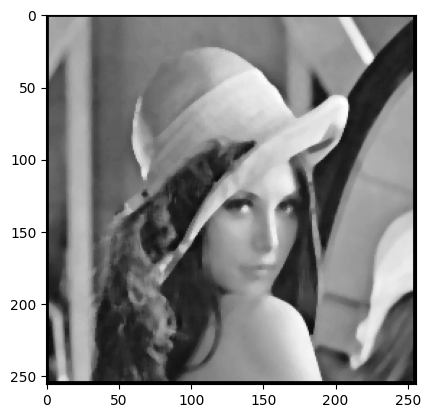

In [67]:
plt.imshow(medianfilter(img, 5), 'gray')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

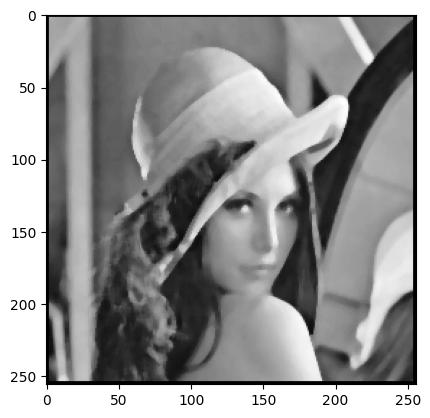

In [68]:
lena = plt.imread('data/lena_medianfilter5.png')
plt.imshow(lena, 'gray')
assert numpy.allclose(medianfilter(img, 5), lena, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [69]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

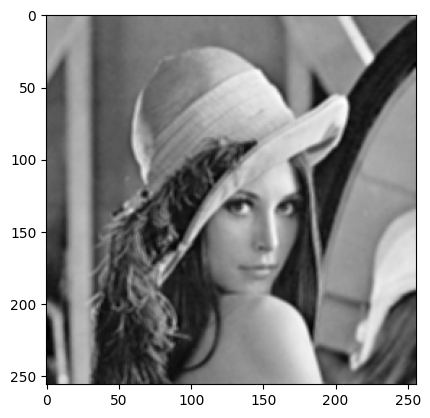

In [70]:
img_scip = scipy.ndimage.uniform_filter(img, 3)
plt.imshow(img_scip, 'gray')
#plt.imshow(meanfilter(img, 3), 'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

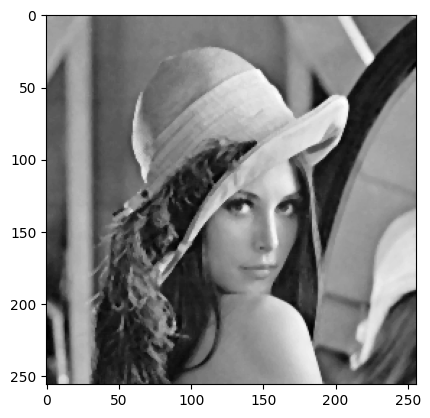

In [71]:
img_scip2 = scipy.ndimage.median_filter(img, 3)
plt.imshow(img_scip2, 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

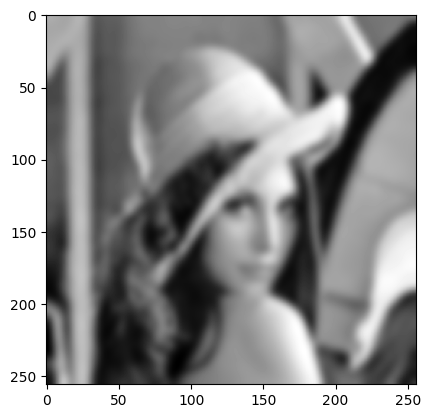

In [72]:
img_scip3 = scipy.ndimage.gaussian_filter(img, 3)
plt.imshow(img_scip3, 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Much more quicker, the border is also filtered by scipy.ndimage

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [73]:
def fastfilter(img, size):
    img_mean = img.copy()
    result = numpy.zeros(img_mean.shape)
    n = (size - 1) // 2
    d = img_mean.shape
    #i = numpy.ndarray[n:(d[0]-n), n:(d[1]-n)]
    for p in numpy.ndindex(img_mean.shape):        
        r = p[0]
        c = p[1]
        if r >= (0+n) and c >= (0+n) and r < (img_mean.shape[0]-n) and c < (img_mean.shape[1]-n):
            slice = img[(p[0]-n):(p[0]+n+1), (p[1]-n):(p[1]+n+1)]
            result[p[0], p[1]] = slice.mean()

    return plt.imshow(result, 'gray')

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

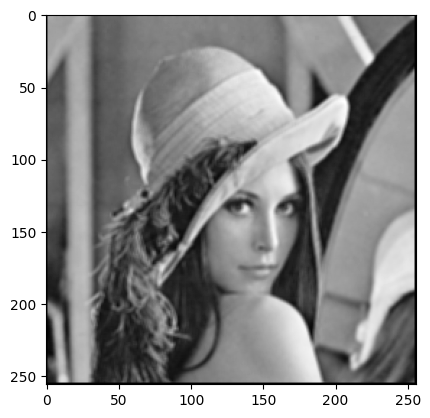

In [74]:
fastfilter(img, 3)

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

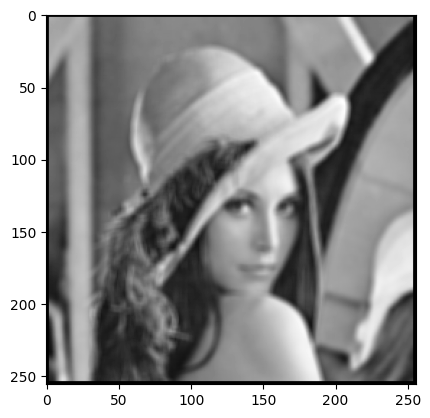

In [79]:
meanfilter(img, 5)
fastfilter(img, 5)
assert numpy.allclose(medianfilter(img, 5), fastfilter(img, 5), atol=1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

486 ms ± 63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.49 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


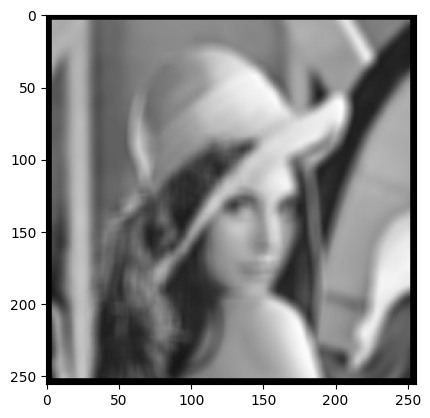

In [78]:
%timeit fastfilter(img, 9)
%timeit meanfilter(img, 9)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: